In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd, eig

In [ ]:
# Load the datasets
X1 = pd.read_csv("/content/hw2-DMD-X0.csv", header=None)
X2 = pd.read_csv("/content/hw2-DMD-X1.csv", header=None)

In [ ]:
# Convert to complex numbers
X1 = X1.applymap(lambda s: complex(s.replace('i', 'j'))).values
X2 = X2.applymap(lambda s: complex(s.replace('i', 'j'))).values

<ipython-input-3-a8697007a196>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X1 = X1.applymap(lambda s: complex(s.replace('i', 'j'))).values
<ipython-input-3-a8697007a196>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X2 = X2.applymap(lambda s: complex(s.replace('i', 'j'))).values


In [ ]:
# Step 1: Compute SVD of X1
U, Sigma, Vh = svd(X1, full_matrices=False)

In [ ]:
# Step 2: Compute the matrix A'
A_tilde = U.conj().T @ X2 @ Vh.conj().T @ np.linalg.inv(np.diag(Sigma))

In [ ]:
# Step 3: Compute the eigenvalues and eigenvectors of A'
eigvals, eigvecs = eig(A_tilde)

In [ ]:
# Step 4: Compute the DMD modes
DMD_modes = X2 @ Vh.conj().T @ np.linalg.inv(np.diag(Sigma)) @ eigvecs

In [ ]:
# Step 5: Forecast the evolution of the system
num_timesteps = 50
b = np.linalg.pinv(DMD_modes) @ X1[:, 0]

X_forecast = np.zeros((X1.shape[0], num_timesteps), dtype=complex)
for i in range(num_timesteps):
    X_forecast[:, i] = DMD_modes @ (eigvals**i * b)

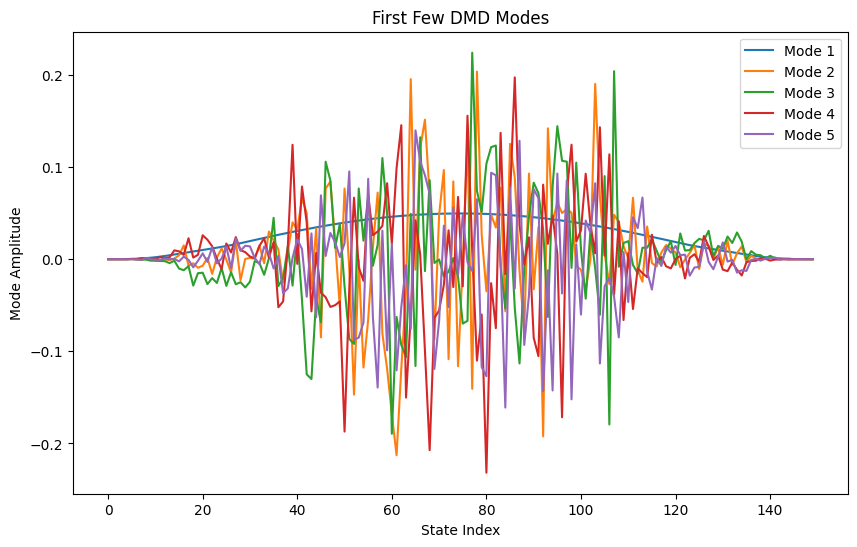

In [ ]:
# Plot the first few modes
plt.figure(figsize=(10, 6))
for i in range(min(5, DMD_modes.shape[1])):
    plt.plot(DMD_modes[:, i].real, label=f'Mode {i+1}')
plt.xlabel("State Index")
plt.ylabel("Mode Amplitude")
plt.legend()
plt.title("First Few DMD Modes")
plt.show()